<h1>Extracting and Visualizing Stock Data</h1>


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Use yfinance to Extract Stock Data
The stock is CocaCola and its ticker symbol is KO

In [25]:
cocacola = yf.Ticker('KO')
cocacola

yfinance.Ticker object <KO>

Extract stock information and save it in a dataframe

In [26]:
#get information for the maximum amount of time
cocacola_data = cocacola.history(period = "max")
#reset the index
cocacola_data.reset_index(inplace=True)
#display the first five rows of the dataframe
cocacola_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02 00:00:00-05:00,0.047053,0.048334,0.047053,0.047053,806400,0.0,0.0
1,1962-01-03 00:00:00-05:00,0.046355,0.046355,0.045306,0.046005,1574400,0.0,0.0
2,1962-01-04 00:00:00-05:00,0.046122,0.046704,0.046122,0.046355,844800,0.0,0.0
3,1962-01-05 00:00:00-05:00,0.046355,0.046937,0.045190,0.045306,1420800,0.0,0.0
4,1962-01-08 00:00:00-05:00,0.044957,0.044957,0.043967,0.044840,2035200,0.0,0.0


## Use Webscraping to Extract CocaCola Revenue Data

In [31]:
url = 'https://www.macrotrends.net/stocks/charts/KO/cocacola/revenue'
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
# save the text
html_data  = requests.get(url, headers=headers).text

html_data

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/KO/cocacola/revenue" />\r\n\t\t<title>CocaCola Revenue 2010-2024 | KO | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">\r\n\t\t<meta name="description" content="CocaCola annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income stat

In [32]:
# parse the html
soup = BeautifulSoup(html_data, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/KO/cocacola/revenue" rel="canonical"/>
<title>CocaCola Revenue 2010-2024 | KO | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="CocaCola annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				


In [29]:
# create a dataframe to store the revenue
cocacola_revenue = pd.DataFrame(columns=["Date", "Revenue"])
cocacola_revenue

,Date,Revenue


In [33]:
# extract the table with GameStop Revenue and store it into the dataframe
for row in soup.find_all("table"):
     if row.find("th").getText().startswith("CocaCola Quarterly Revenue"):
           for row in row.find("tbody").find_all("tr"):
            col = row.find_all("td")
            date = col[0].text
            revenue = col[1].text
            cocacola_revenue = pd.concat([cocacola_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True) 

cocacola_revenue

,Date,Revenue
0,2024-03-31,"$11,300"
1,2023-12-31,"$10,849"
2,2023-09-30,"$11,953"
3,2023-06-30,"$11,972"
4,2023-03-31,"$10,980"
...,...,...
56,2010-03-31,"$7,525"
57,2009-12-31,"$7,510"
58,2009-09-30,"$8,044"
59,2009-06-30,"$8,267"


In [35]:
# remove the comma and dollar sign from the Revenue column
cocacola_revenue["Revenue"] = cocacola_revenue['Revenue'].str.replace(',|\$',"", regex=True)
# remove an null or empty strings in the Revenue column
cocacola_revenue.dropna(inplace=True)
cocacola_revenue = cocacola_revenue[cocacola_revenue['Revenue'] != ""]

cocacola_revenue

,Date,Revenue
0,2024-03-31,11300
1,2023-12-31,10849
2,2023-09-30,11953
3,2023-06-30,11972
4,2023-03-31,10980
...,...,...
56,2010-03-31,7525
57,2009-12-31,7510
58,2009-09-30,8044
59,2009-06-30,8267


In [37]:
# display the first five rows of the cocacola_revenue dataframe 
cocacola_revenue.head()

,Date,Revenue
0,2024-03-31,11300
1,2023-12-31,10849
2,2023-09-30,11953
3,2023-06-30,11972
4,2023-03-31,10980


In [38]:
#display the last five rows of the cocacola_revenue dataframe 
cocacola_revenue.tail()

,Date,Revenue
56,2010-03-31,7525
57,2009-12-31,7510
58,2009-09-30,8044
59,2009-06-30,8267
60,2009-03-31,7169


## Plot CocaCola Stock Graph


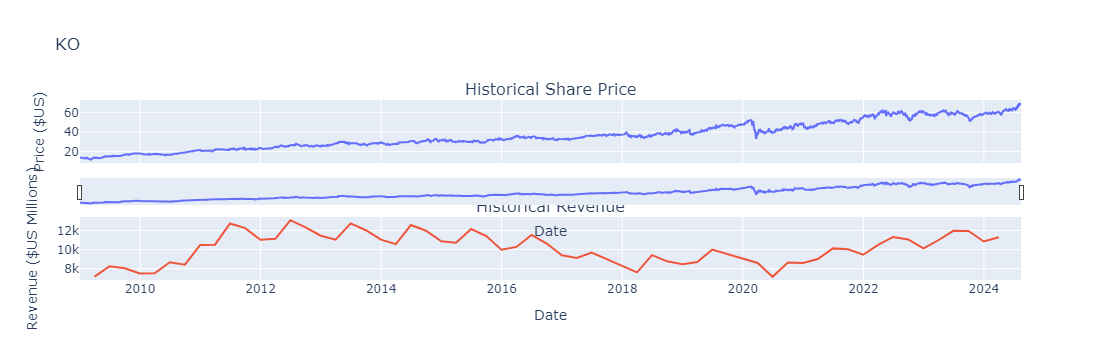

In [57]:
# define graphing function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price",  "Historical Revenue"), vertical_spacing = .3)
    date = (stock_data.Date.astype('string') <= '2024-08-14') & (stock_data.Date.astype('string') >= '2009-01-01')
    stock_data_specific = stock_data[date]
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-08-14' ]
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date.astype('string')), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

# use the function to graph the CocaCola Stock Data
make_graph(cocacola_data, cocacola_revenue, 'KO' )